In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(val, name, x_label, y_label, file):
    plt.figure(figsize=(16, 9))
    plt.plot(val)
    plt.title(name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"plots/{file}.png")
    plt.show()
    
def pritnt_subplot(y1, y2, y3, y4=1, title1 = 'Plot1', title2 = 'Plot2', title3 = 'Plot3' , title4 = 'Plot4'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
    ax1.plot(y1)
    ax1.set_title(title1)
    ax2.plot(y2)
    ax2.set_title(title2)
    ax3.plot(y3)
    ax3.set_title(title3)
    ax4.plot(y4)
    ax4.set_title(title4)
    plt.show()

In [3]:
psi = np.fromfile('wf.dat', dtype=np.cdouble)
print(psi)

NX, NY, NZ = 128, 128, 128
dx, dy, dz = 1, 1, 1

Psi_x, Psi_y, Psi_z = [], [], []

Psi_norm_x, Psi_norm_y, Psi_norm_z, Psi_pow_x, Psi_pow_y, Psi_pow_z = [], [], [], [], [], []

for ix in range(NX):
    Psi_x.append(psi[int( (NZ/2)*dz + NZ*(NY/2)*dy + NZ*NY*ix )])
    Psi_y.append(psi[int( (NZ/2)*dz + NZ*ix + NZ*NY*(NX/2)*dx )])
    Psi_z.append(psi[int( ix + NZ*(NY/2)*dy + NZ*NY*(NX/2)*dx )])

    Psi_norm_x.append(np.sqrt(np.power(np.real(Psi_x[ix]), 2) + np.power(np.imag(Psi_x[ix]), 2)))
    Psi_norm_y.append(np.sqrt(np.power(np.real(Psi_y[ix]), 2) + np.power(np.imag(Psi_y[ix]), 2)))
    Psi_norm_z.append(np.sqrt(np.power(np.real(Psi_z[ix]), 2) + np.power(np.imag(Psi_z[ix]), 2)))

    Psi_pow_x.append(np.power(np.real(Psi_x[ix]), 2) + np.power(np.imag(Psi_x[ix]), 2))
    Psi_pow_y.append(np.power(np.real(Psi_y[ix]), 2) + np.power(np.imag(Psi_y[ix]), 2))
    Psi_pow_z.append(np.power(np.real(Psi_z[ix]), 2) + np.power(np.imag(Psi_z[ix]), 2))

[1.57079298e-14-9.30705132e-14j 1.57079298e-14-9.30705132e-14j
 1.57079298e-14-9.30705132e-14j ... 3.66052774e-14-2.18573160e-13j
 3.66052774e-14-2.18573160e-13j 3.66052774e-14-2.18573160e-13j]


In [4]:
#plot(Psi_norm_x, "|psi|(x, NY/2, NZ/2)", "x", "|psi|", "psi_x")

In [5]:
#plot(Psi_norm_y, "|psi|(NX/2, y, NZ/2)", "z", "|psi|", "psi_y")

In [6]:
#plot(Psi_norm_z, "|psi|(NX/2, NY/2, z)", "y", "|psi|",  "psi_z")

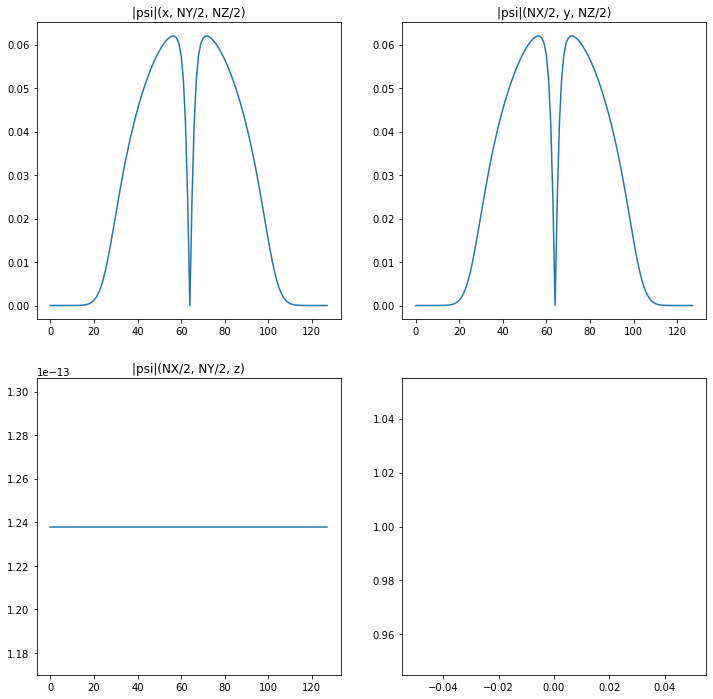

In [7]:
pritnt_subplot(Psi_norm_x, Psi_norm_y, Psi_norm_z, 1,"|psi|(x, NY/2, NZ/2)", "|psi|(NX/2, y, NZ/2)", "|psi|(NX/2, NY/2, z)", "")

In [8]:
#plot(Psi_pow_x, "|psi|^2(x, NY/2, NZ/2)", "x", "|psi|^2", "psi2_x")

In [9]:
#plot(Psi_pow_y, "|psi|^2(NX/2, y, NZ/2)", "y", "|psi|^2", "psi2_y")

In [10]:
#plot(Psi_pow_z, "|psi|^2(NX/2, NY/2, z)", "z", "|psi|^2", "psi2_z")

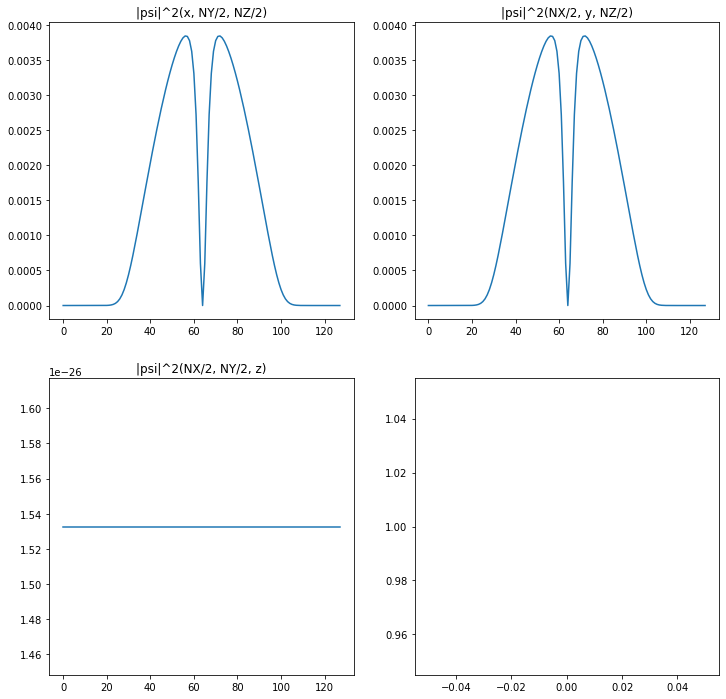

In [11]:
pritnt_subplot(Psi_pow_x, Psi_pow_y, Psi_pow_z, 1,"|psi|^2(x, NY/2, NZ/2)", "|psi|^2(NX/2, y, NZ/2)", "|psi|^2(NX/2, NY/2, z)", "")

In [12]:
#const declaration
h_bar = 1 #(6.62607004*10**-34)/(np.pi*2)
m = 2  #6.6464731e-27 #9.10938356*10**-31

In [13]:
Psi = [[x,y,z] for x,y,z in zip(Psi_x,Psi_y,Psi_z)]

C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


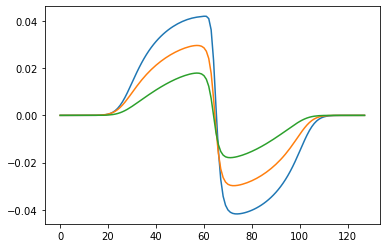

In [14]:
"""
def divergence(Psi_x,Psi_y,Psi_z) -> np.array:   
    div = np.gradient(Psi_x) + np.gradient(Psi_y) + np.gradient(Psi_z) 
    return div.reshape(len(div),1)

plt.plot(divergence(Psi_x,Psi_y,Psi_z))
"""

def divergence(F) -> np.array:   
    return np.sum(np.gradient(F),axis=0)

plt.plot(divergence(Psi))

In [15]:
"""
def calculate_J(Psi):
    J = ((h_bar/(2*m*1j))*(np.multiply(np.conj(Psi),divergence(Psi_x,Psi_y,Psi_z))-
                           np.multiply(Psi,divergence(np.conj(Psi_x),np.conj(Psi_y),np.conj(Psi_z)))))

    return J
"""
def calculate_J(Psi):
    J = ((h_bar/(2*m*1j))*(np.multiply(np.conj(Psi),divergence(Psi))-np.multiply(Psi,divergence(np.conj(Psi)))))

    return J

j = calculate_J(Psi)

j_x = [j_tmp[0] for j_tmp in j]
j_y = [j_tmp[1] for j_tmp in j]
j_z = [j_tmp[2] for j_tmp in j]

j_xnorm = [np.sqrt(np.power(np.real(x), 2) + np.power(np.imag(x), 2)) for x in j_x]
j_ynorm = [np.sqrt(np.power(np.real(y), 2) + np.power(np.imag(y), 2)) for y in j_y]
j_znorm = [np.sqrt(np.power(np.real(z), 2) + np.power(np.imag(z), 2)) for z in j_z]

In [16]:
#plot(j_xnorm, "|j|(x, NY/2, NZ/2)", "x", "|j|", "j_x")

In [17]:
#plot(j_ynorm, "|j|(NX/2, y, NZ/2)", "y", "|j|", "j_y")

In [18]:
#plot(j_znorm, "|j|(NX/2, NY/2, z)", "z", "|j|", "j_z")

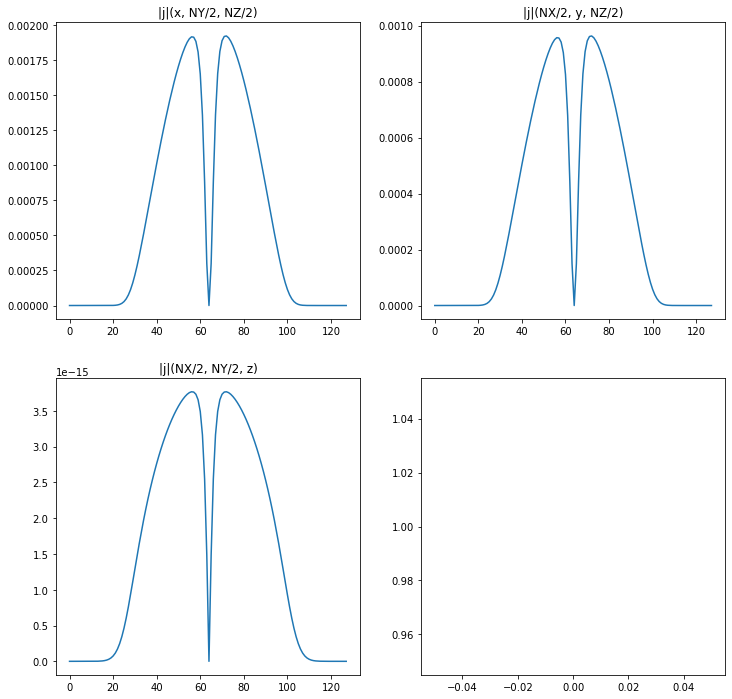

In [19]:
pritnt_subplot(j_xnorm, j_ynorm, j_znorm, 1,"|j|(x, NY/2, NZ/2)", "|j|(NX/2, y, NZ/2)", "|j|(NX/2, NY/2, z)", "")

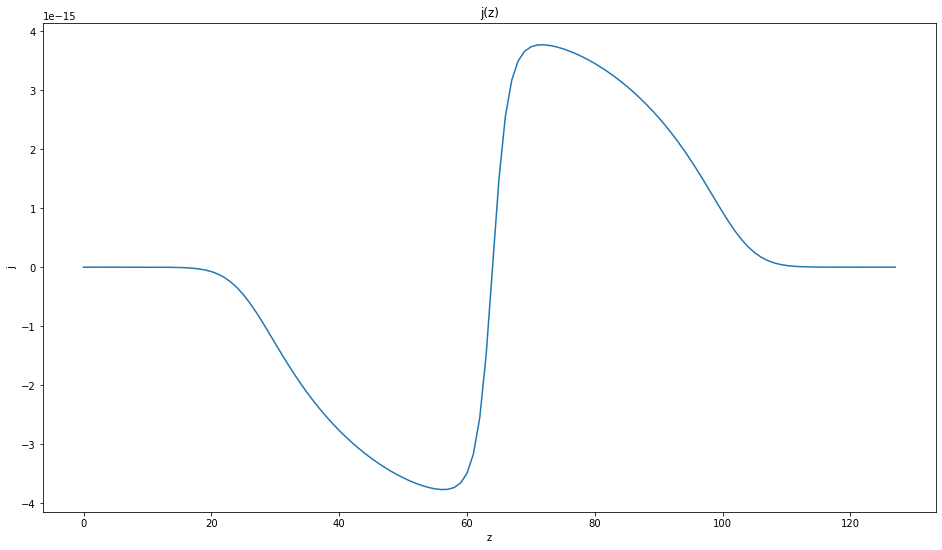

In [20]:
plot(j_z, "j(z)", "z", "j", "j(z)")

In [21]:
"""
4 way to cal derivative
"""

def derivative3p(F,dx):
    der = []
    F = np.array(F)
    for i,_ in enumerate(F):
        if i < len(F)-2:
            der.append((4*F[i+1]-3*F[i] - F[i+2])/(dx*2))
        if i == len(F)-2:
            der.append(0)
        if i == len(F)-1:
            der.append(0)

    return np.array(der)

def derivative(F):
    return np.gradient(F)

def fft_derivative(x):
    fhat = np.fft.fft(x)
    kappa = (2*np.pi/128)*np.arange(0,128)
    kappa = np.fft.fftshift(kappa)
    dfhat = kappa * fhat * (1j)
    dfFFT = np.real(np.fft.ifft(dfhat))
    return dfFFT

import scipy.fftpack as fft

In [22]:
Psi_pow = [[x,y,z] for x,y,z in zip(Psi_pow_x,Psi_pow_y,Psi_pow_z)]

def Rho_calc(Psi_pow):
    return np.sum(Psi_pow[:,0]) * np.sum(Psi_pow[:,1]) * np.sum(Psi_pow[:,2])
    
Rho = Rho_calc(np.array(Psi_pow))
Rho

5.617657281968627e-26

C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


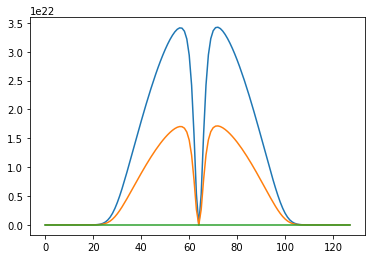

In [23]:
v = j/Rho

plt.plot(v)

In [24]:
def Curl(v):
    """
    calc curl using 4 method
    """
    #x = derivative(v[:,2]) - derivative(v[:,1])
    #y = derivative(v[:,0]) - derivative(v[:,2])
    #z = derivative(v[:,1]) - derivative(v[:,0])
    """
    return (derivative3p(v[:,1],dx) - derivative3p(v[:,0],dy), derivative(v[:,1]) - derivative(v[:,0]),
            fft_derivative(v[:,1]) - fft_derivative(v[:,0]),
            fft.diff(v[:,1], period=2*np.pi/128) - fft.diff(v[:,0] ,period=2*np.pi/128))
            
    """
    
    return (np.gradient(v[:,1],dx) - np.gradient(v[:,0],dy), derivative(v[:,1]) - derivative(v[:,0]),
            fft_derivative(v[:,1]) - fft_derivative(v[:,0]),
            fft.diff(v[:,1], period=2*np.pi/128) - fft.diff(v[:,0] ,period=2*np.pi/128))
    
Omega_3p, Omega_2p, Omega_fft_my, Omega_fft_sc = np.array(Curl(v))

C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


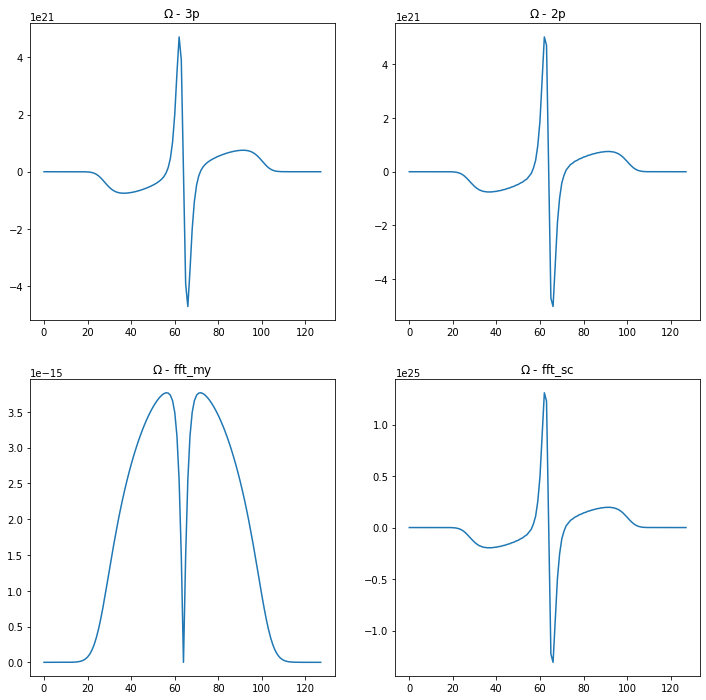

In [25]:
pritnt_subplot(Omega_3p, Omega_fft_my, j_znorm, Omega_fft_sc,"$\Omega$ - 3p", "$\Omega$ - 2p", "$\Omega$ - fft_my", "$\Omega$ - fft_sc")

In [26]:
L = [-h_bar*1j*(np.gradient(Psi_y) - np.gradient(Psi_z)), -h_bar*1j*(np.gradient(Psi_z) - np.gradient(Psi_x)), 
            -h_bar*1j*(np.gradient(Psi_x) - np.gradient(Psi_y))]

C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


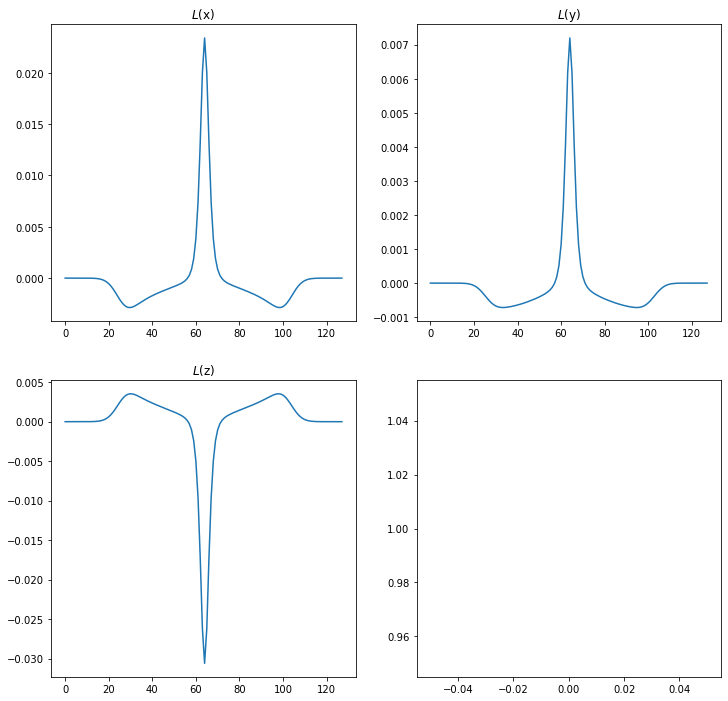

In [27]:
pritnt_subplot(L[0], L[1], L[2], 1,"$L$(x)", "$L$(y)", "$L$(z)", "")

In [28]:
L_norm = [np.sqrt(np.power(np.real(L[i]), 2) + np.power(np.imag(L[i]), 2)) for i in range(3)]

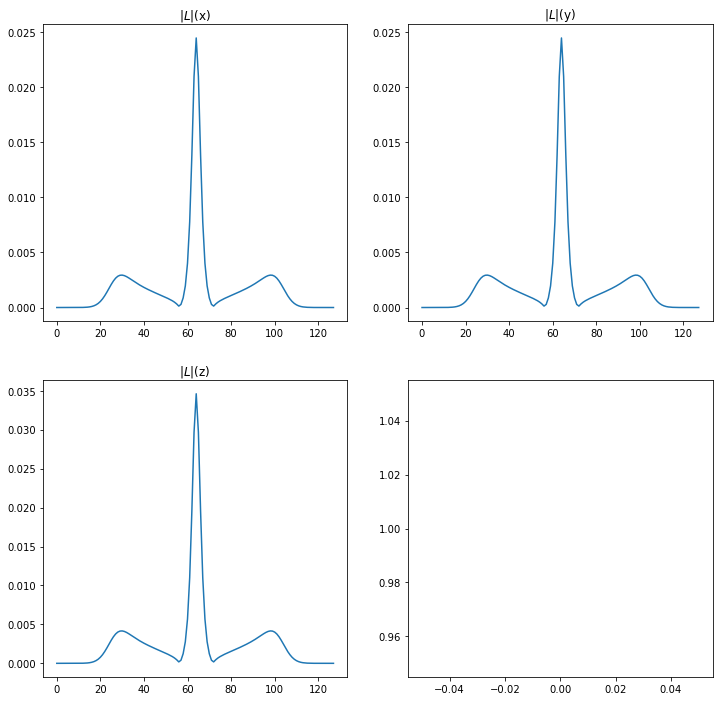

In [29]:
pritnt_subplot(L_norm[0], L_norm[1], L_norm[2], 1,"$|L|$(x)", "$|L|$(y)", "$|L|$(z)", "")

C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


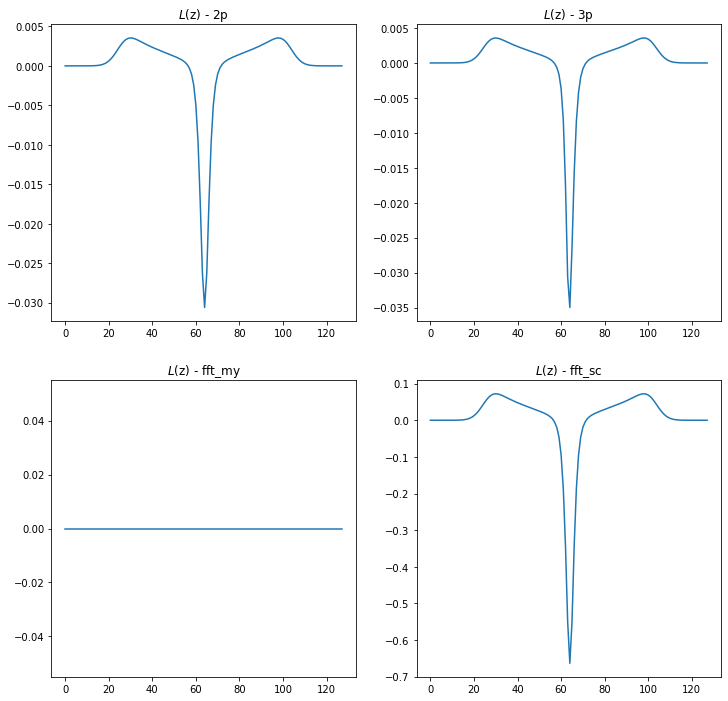

In [30]:
L_3p = [-h_bar*1j*(derivative3p(Psi_y,dx) - derivative3p(Psi_z,dx)), -h_bar*1j*(derivative3p(Psi_z,dx) - derivative3p(Psi_x,dx)), 
            -h_bar*1j*(derivative3p(Psi_x,dx) - derivative3p(Psi_y,dx))]

L_fft_my = [-h_bar*1j*(fft_derivative(Psi_y) - fft_derivative(Psi_z)), -h_bar*1j*(fft_derivative(Psi_z) - fft_derivative(Psi_x)), 
            -h_bar*1j*(fft_derivative(Psi_x) - fft_derivative(Psi_y))]

L_fft_sc = [-h_bar*1j*(fft.diff(Psi_y) - fft.diff(Psi_z)), -h_bar*1j*(fft.diff(Psi_z) - fft.diff(Psi_x)), 
            -h_bar*1j*(fft.diff(Psi_x) - fft.diff(Psi_y))]


pritnt_subplot(L[2], L_3p[2], L_fft_my[2], L_fft_sc[2],"$L$(z) - 2p", "$L$(z) - 3p", "$L$(z) - fft_my", "$L$(z) - fft_sc")

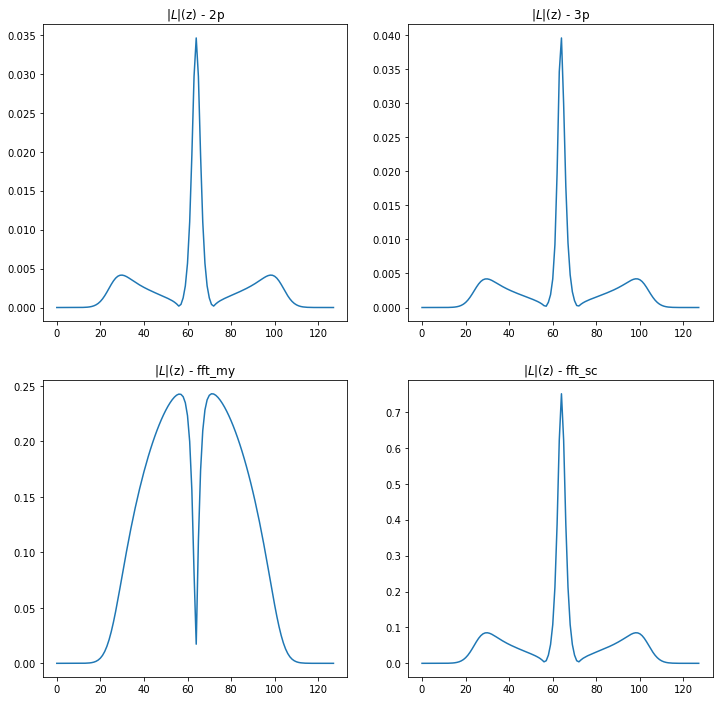

In [31]:
L_3p_norm = [np.sqrt(np.power(np.real(L_3p[i]), 2) + np.power(np.imag(L_3p[i]), 2)) for i in range(3)]
L_fft_my_norm = [np.sqrt(np.power(np.real(L_fft_my[i]), 2) + np.power(np.imag(L_fft_my[i]), 2)) for i in range(3)]
L_fft_sc_norm  = [np.sqrt(np.power(np.real(L_fft_sc[i]), 2) + np.power(np.imag(L_fft_sc[i]), 2)) for i in range(3)]

pritnt_subplot(L_norm[2], L_3p_norm[2], L_fft_my_norm[2], L_fft_sc_norm[2],"$|L|$(z) - 2p", "$|L|$(z) - 3p", "$|L|$(z) - fft_my", "$|L|$(z) - fft_sc")

In [32]:
L_x = []
L_y = []
L_z = []
for i,(dx,dy,dz) in enumerate(zip(derivative(Psi_x), derivative(Psi_y), derivative(Psi_z))):
    L_x.append(h_bar*1j*(64*dz-i*dy))
    L_y.append(h_bar*1j*(i*dx-64*dz))
    L_z.append(h_bar*1j*(64*dx-64*dy))

C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


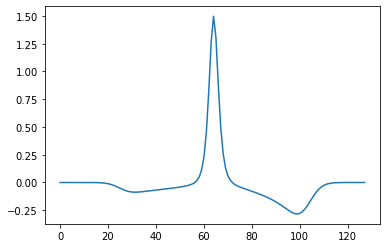

In [33]:
plt.plot(L_x)

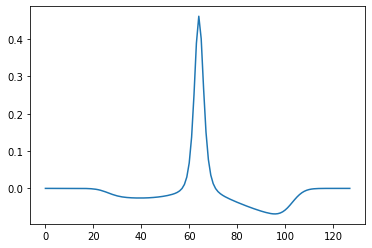

In [34]:
plt.plot(L_y)

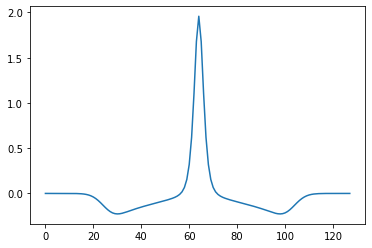

In [35]:
plt.plot(L_z)

In [36]:
def L(Psi_i, Psi_j):
    L = np.zeros((len(Psi_i),len(Psi_j)))
    for i, di in enumerate(derivative(Psi_i)):
        for j, dj in enumerate(derivative(Psi_j)):
            temp = h_bar*1j*((j-64)*di-(i-64)*dj)
            L[i][j] = np.sqrt(temp.real**2 + temp.imag**2)

    return L

In [37]:
L_x = L(Psi_y, Psi_z)
L_y = L(Psi_z, Psi_x)
L_z = L(Psi_x, Psi_y)

In [61]:
def plot_heatmap(L, x_axis="x", y_axis="y", title="heatmap"):
    a, b = np.meshgrid(np.linspace(-64, 64, 128), np.linspace(-64,64, 128))

    figure, axes = plt.subplots()

    l_a=a.min()
    r_a=a.max()
    l_b=b.min()
    r_b=b.max()

    c = axes.pcolormesh(a, b, L, cmap='hot', vmin=L.min(), vmax=L.max())
    axes.set_title(title)
    axes.axis([l_a, r_a, l_b, r_b])
    figure.colorbar(c)
    
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)

    plt.show()

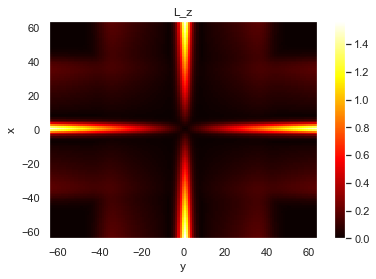

In [63]:
plot_heatmap(L_z, "y", "x", "L_z")

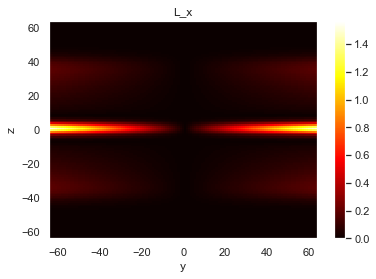

In [64]:
plot_heatmap(L_x, "y", "z", "L_x")

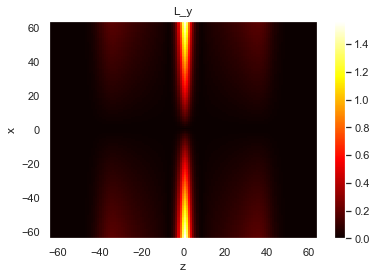

In [65]:
plot_heatmap(L_y, "z", "x", "L_y")